In [10]:
from tqdm import tqdm
import pandas as pd
import numpy as np
import datetime                                                          # manipulating date formats
import matplotlib.pyplot as plt                                          # basic plotting
import seaborn as sns                                                    # for prettier plot

In [11]:
pd.set_option('display.max_columns', 500)
df = pd.read_excel('Superstore.xls', parse_dates = True)
df = df.sort_values(by = ['Order Date'])
df.reset_index(inplace = True, drop = True)

In [12]:
df.info() # no obvious missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
Row ID           9994 non-null int64
Order ID         9994 non-null object
Order Date       9994 non-null datetime64[ns]
Ship Date        9994 non-null datetime64[ns]
Ship Mode        9994 non-null object
Customer ID      9994 non-null object
Customer Name    9994 non-null object
Segment          9994 non-null object
Country          9994 non-null object
City             9994 non-null object
State            9994 non-null object
Postal Code      9994 non-null int64
Region           9994 non-null object
Product ID       9994 non-null object
Category         9994 non-null object
Sub-Category     9994 non-null object
Product Name     9994 non-null object
Sales            9994 non-null float64
Quantity         9994 non-null int64
Discount         9994 non-null float64
Profit           9994 non-null float64
dtypes: datetime64[ns](2), float64(3), int64(3), object(13)
memory usage: 1.6+ 

In [13]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [14]:
df[['Ship Mode', 'Segment', 'City', 'State', 'Region', 'Category', 'Sub-Category', 'Product Name']].describe()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Product Name
count,9994,9994,9994,9994,9994,9994,9994,9994
unique,4,3,531,49,4,3,17,1850
top,Standard Class,Consumer,New York City,California,West,Office Supplies,Binders,Staple envelope
freq,5968,5191,915,2001,3203,6026,1523,48


## Exploratory Data Analysis 
### Comparing profits vs sale of different regions

In [15]:
sub_df = df[['Order Date', 'Region', 'Profit']]
sub_df

,Order Date,Region,Profit
0,2014-01-03,Central,5.5512
1,2014-01-04,Central,4.2717
2,2014-01-04,Central,-64.7748
3,2014-01-04,Central,-5.4870
4,2014-01-05,East,4.8840
...,...,...,...
9989,2017-12-30,West,-0.6048
9990,2017-12-30,East,19.7910
9991,2017-12-30,East,2.7279
9992,2017-12-30,West,4.5188


In [17]:
num_sales = sub_df['Region'].value_counts()
num_sales

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

In [18]:
profits_region = sub_df.groupby('Region')['Profit'].sum()
profits_region

Region
Central     39706.3625
East        91522.7800
South       46749.4303
West       108418.4489
Name: Profit, dtype: float64

In [19]:
profits_sales = profits_region / num_sales
profits_sales.sort_values(inplace = True, ascending = False)

In [20]:
regions = list(profits_sales.index)
values = profits_sales.to_numpy()

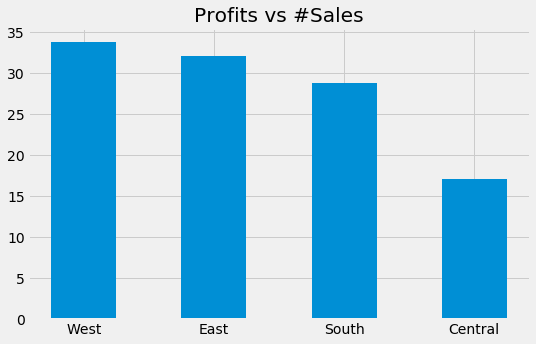

In [21]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = 8, 5
fig, ax = plt.subplots()
ax.bar(regions, values, width = 0.5)
ax.set_title('Profits vs #Sales')
plt.show()

### Which segment is most profitable (Profits / # sales)?

In [22]:
sub_df = df[['Order Date', 'Segment', 'Profit', ]]
sub_df

,Order Date,Segment,Profit
0,2014-01-03,Consumer,5.5512
1,2014-01-04,Home Office,4.2717
2,2014-01-04,Home Office,-64.7748
3,2014-01-04,Home Office,-5.4870
4,2014-01-05,Consumer,4.8840
...,...,...,...
9989,2017-12-30,Consumer,-0.6048
9990,2017-12-30,Consumer,19.7910
9991,2017-12-30,Consumer,2.7279
9992,2017-12-30,Corporate,4.5188


In [23]:
num_sales = sub_df['Segment'].value_counts()
num_sales

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [24]:
segment_profits = sub_df.groupby('Segment')['Profit'].sum()
segment_profits

Segment
Consumer       134119.2092
Corporate       91979.1340
Home Office     60298.6785
Name: Profit, dtype: float64

In [25]:
profit_sales = segment_profits / num_sales
profit_sales.sort_values(inplace = True, ascending = False)
profit_sales

Segment
Home Office    33.818664
Corporate      30.456667
Consumer       25.836873
dtype: float64

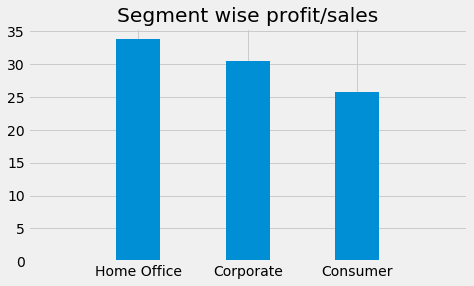

In [26]:
plt.rcParams['figure.figsize'] = 7, 4
values = profit_sales.to_numpy()
segments = list(profit_sales.index)
indices = [0.5, 1, 1.5]
plt.bar(indices, values, width = 0.2)
plt.xticks(ticks = indices, labels = segments)
plt.title('Segment wise profit/sales')
plt.xlim(0,2)
plt.plot();


## Forecastng

In [27]:
office_supplies = df.loc[df['Category'] == 'Office Supplies']
office_supplies = office_supplies[['Order Date', 'Sales']]
office_supplies = office_supplies.groupby('Order Date')['Sales'].sum().reset_index()
office_supplies = office_supplies.set_index('Order Date')
ts = office_supplies['Sales'].resample('MS').mean() # monthly average

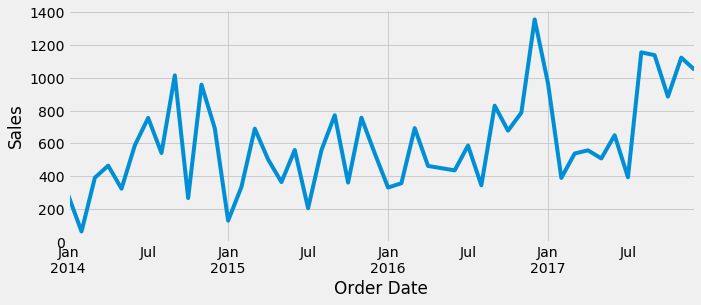

In [28]:
plt.style.use('fivethirtyeight')
ts.plot(figsize = (10,4))
plt.ylabel('Sales')
plt.show()

In [29]:
# Splitting the dataset
train_fraction = 0.8
test_idx = int(ts.shape[0] * train_fraction)
ts_test = ts[test_idx:]
ts_train = ts[:test_idx]

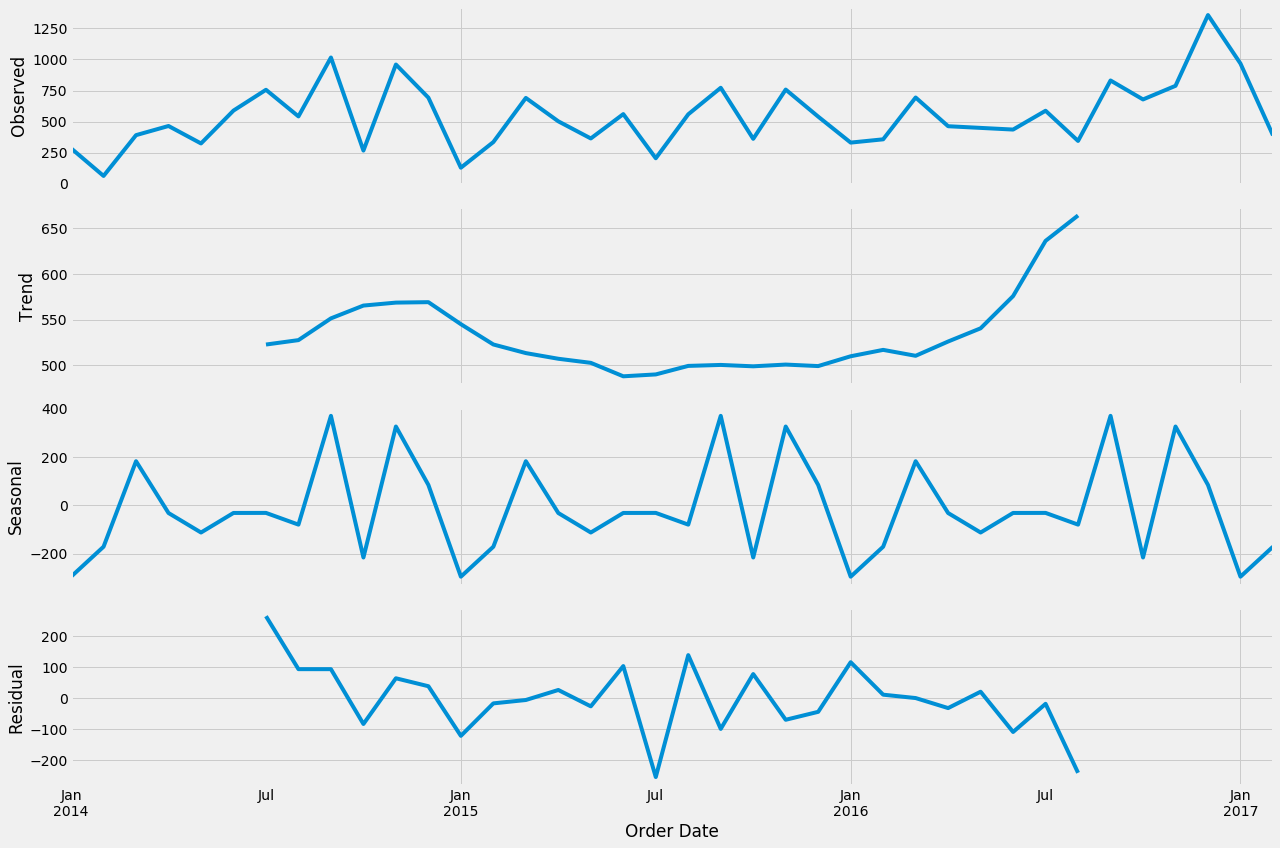

In [30]:
import statsmodels.api as sm
plt.rcParams['figure.figsize'] = 18, 12
decomposition = sm.tsa.seasonal_decompose(ts_train, model='additive')
fig = decomposition.plot()
plt.show()

In [31]:
from statsmodels.tsa.stattools import adfuller, acf, pacf, arma_order_select_ic
def test_stationarity(timeseries):    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [32]:
test_stationarity(ts_train) # NOT a unit root process

Results of Dickey-Fuller Test:
Test Statistic                 -5.035246
p-value                         0.000019
#Lags Used                      0.000000
Number of Observations Used    37.000000
Critical Value (1%)            -3.620918
Critical Value (5%)            -2.943539
Critical Value (10%)           -2.610400
dtype: float64


In [33]:
from statsmodels.tsa.stattools import kpss
def kpss_test(series, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')


In [34]:
kpss_test(ts_train)

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)


KPSS Statistic: 0.3484670089164574
p-value: 0.0993676685704925
num lags: 10
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


In [35]:
import scipy.stats as scs
import statsmodels.tsa.api as smt

def tsplot(y, lags = None, figsize = (10, 8), style='bmh', title = ''):
    
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        #mpl.rcParams['font.family'] = 'Ubuntu Mono'
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))
        
        y.plot(ax=ts_ax)
        ts_ax.set_title(title)
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.5)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5)
        sm.qqplot(y, line='s', ax=qq_ax)
        qq_ax.set_title('QQ Plot')        
        scs.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)

        plt.tight_layout()
    return

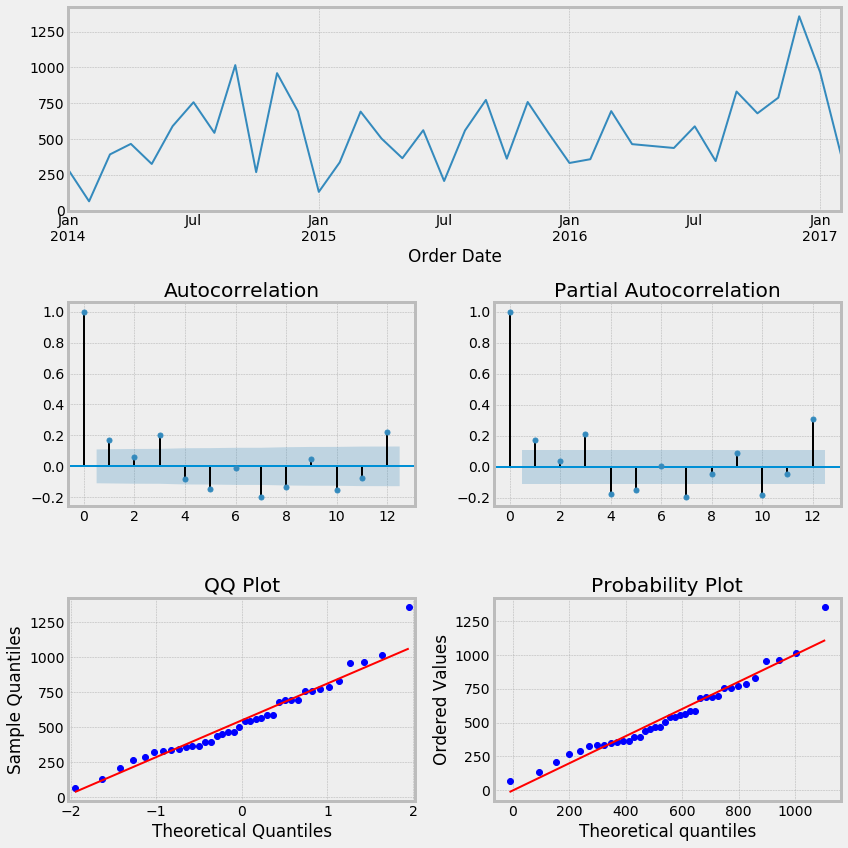

In [36]:
limit = 12 # we wont consider time dependencies beyond one year (my choice)
tsplot(ts_train, lags = limit, figsize = (12, 12))

In [37]:
def find_arma_aic(ts, maxp, maxq):
    best_aic = np.inf 
    best_order_aic = None
    best_mdl_aic = None

    for i in range(maxp):
        for j in range(maxq):
            try:
                tmp_mdl = smt.ARMA(ts, order = (i, j)).fit(method = 'mle', trend = 'nc')
                tmp_aic = tmp_mdl.aic
                if tmp_aic < best_aic:
                    best_aic = tmp_aic
                    best_order_aic = (i, j)
                    best_mdl_aic = tmp_mdl
            except: continue
    return best_mdl_aic, best_aic, best_order_aic

In [38]:
best_mdl_aic, best_aic, best_order_aic = find_arma_aic(ts_train, 4, 4)
print('aic: {:6.5f} | order: {}'.format(best_aic, best_order_aic))

aic: 541.25470 | order: (3, 0)


In [39]:
def find_arma_bic(ts, maxp, maxq):
    best_bic = np.inf 
    best_order_bic = None
    best_mdl_bic = None

    for i in range(4):
        for j in range(4):
            try:
                tmp_mdl = smt.ARMA(ts, order = (i, j)).fit(method = 'mle', trend = 'nc')
                tmp_bic = tmp_mdl.bic
                if tmp_bic < best_bic:
                    best_bic = tmp_bic
                    best_order_bic = (i, j)
                    best_mdl_bic = tmp_mdl
            except: continue
    return best_mdl_bic, best_bic, best_order_bic

In [40]:
best_mdl_bic, best_bic, best_order_bic = find_arma_bic(ts_train, 4, 4)
print('bic: {:6.5f} | order: {}'.format(best_bic, best_order_bic))

bic: 546.46879 | order: (1, 1)


#### It is an ARMA(1,1) process

In [41]:
model = smt.ARMA(ts, order = best_order_bic).fit(method = 'mle', trend = 'nc')
train_timestamps = ts.index[:test_idx]
test_timestamps = ts.index[test_idx:]
ts_pred = model.predict(test_idx) # recursive forecasting
ts_pred

ValueError: The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.

In [42]:
ts_test

Order Date
2017-03-01     538.899481
2017-04-01     558.229296
2017-05-01     508.776444
2017-06-01     650.463038
2017-07-01     393.902615
2017-08-01    1156.148154
2017-09-01    1139.137250
2017-10-01     886.045846
2017-11-01    1124.012036
2017-12-01    1049.549724
Freq: MS, Name: Sales, dtype: float64

In [45]:
last_train, last_train_timestamp = ts_train[-1], ts_train.index[-1]
ts_pred[last_train_timestamp] = last_train
ts_test[last_train_timestamp] = last_train
test_timestamps = test_timestamps.insert(0, last_train_timestamp).sort_values()
ts_pred = ts_pred.sort_index()
ts_test = ts_test.sort_index()


NameError: name 'ts_pred' is not defined

In [46]:
plt.rcParams['figure.figsize'] = 12, 4
plt.plot(train_timestamps, ts_train)
plt.plot(test_timestamps, ts_test, linestyle = '--', label = 'Test')
plt.plot(test_timestamps, ts_pred, label = 'Forecast')
plt.legend()
plt.title('Sales forecast')
plt.show();

NameError: name 'train_timestamps' is not defined

### ARMA(3,0) or AR(3)

In [47]:
model = smt.ARMA(ts, order = best_order_aic).fit(method = 'mle', trend = 'nc')
train_timestamps = ts.index[:test_idx]
test_timestamps = ts.index[test_idx:]
ts_pred = model.predict(test_idx) # recursive forecasting
ts_pred

Order Date
2017-03-01     868.416528
2017-04-01     652.562881
2017-05-01     468.915543
2017-06-01     512.021943
2017-07-01     561.415253
2017-08-01     477.334960
2017-09-01     759.546811
2017-10-01     814.192015
2017-11-01    1010.373968
2017-12-01    1038.696839
Freq: MS, dtype: float64

In [48]:
ts_test

Order Date
2017-03-01     538.899481
2017-04-01     558.229296
2017-05-01     508.776444
2017-06-01     650.463038
2017-07-01     393.902615
2017-08-01    1156.148154
2017-09-01    1139.137250
2017-10-01     886.045846
2017-11-01    1124.012036
2017-12-01    1049.549724
Freq: MS, Name: Sales, dtype: float64

In [49]:
last_train, last_train_timestamp = ts_train[-1], ts_train.index[-1]
ts_pred[last_train_timestamp] = last_train
ts_test[last_train_timestamp] = last_train
test_timestamps = test_timestamps.insert(0, last_train_timestamp).sort_values()
ts_pred = ts_pred.sort_index()
ts_test = ts_test.sort_index()


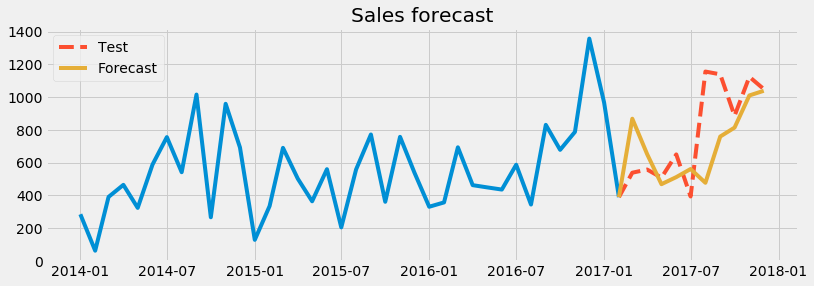

In [50]:
plt.rcParams['figure.figsize'] = 12, 4
plt.plot(train_timestamps, ts_train)
plt.plot(test_timestamps, ts_test, linestyle = '--', label = 'Test')
plt.plot(test_timestamps, ts_pred, label = 'Forecast')
plt.legend()
plt.title('Sales forecast')
plt.show();